In [4]:
import matplotlib.pyplot as plt
from train_valid_test_loader import load_train_valid_test_datasets
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
import numpy as np

epoch       0.000 | loss_total     1.37503 | train_AUC    0.50269 | train_MAE    1.00264 | valid_AUC     0.49616 | valid_MAE     1.00803 | grad_wrt_mu     0.25007 | grad_wrt_b_per_user     0.00212 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.000 | loss_total     1.34410 | train_AUC    0.50717 | train_MAE    0.99689 | valid_AUC     0.50111 | valid_MAE     1.00177 | grad_wrt_mu     1.08438 | grad_wrt_b_per_user     0.00202 | grad_wrt_c_per_item     0.00113 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.44367 | train_AUC    0.51510 | train_MAE    0.97279 | valid_AUC     0.51694 | valid_MAE     0.97556 | grad_wrt_mu     0.52100 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00124 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.15575 | train_AUC    0.53693 | train_MAE    0.96094 | valid_AUC     0.53457 | valid_MAE     0.96278 | grad_wrt_mu     0.

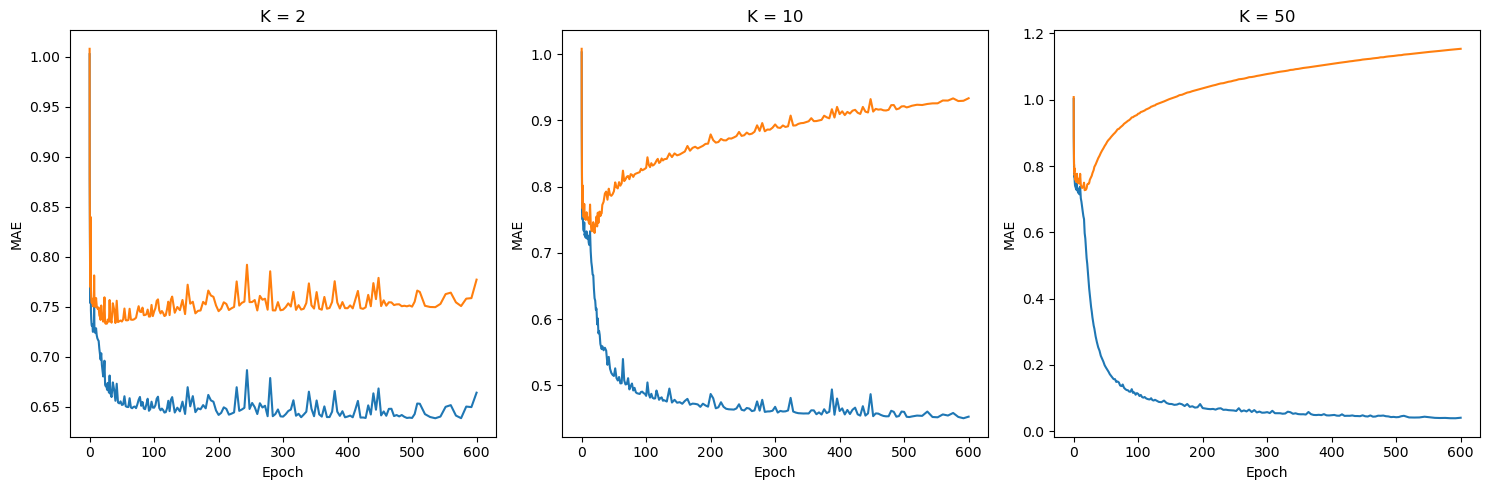

In [11]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
n_factors_list = [2, 10, 50]

# Create subplots for the trace plots
fig, axs = plt.subplots(1, len(n_factors_list), figsize=(15, 5))

for i, n_factors in enumerate(n_factors_list):
    # Create the model and initialize its parameters
    model = CollabFilterOneVectorPerItem(
        n_epochs=600, batch_size=32, step_size=0.2, n_factors=n_factors, alpha=0.0
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    # Fit the model with SGD
    model.fit(train_tuple, valid_tuple)
    
    # Plot the MAE trace
    axs[i].plot(model.trace_epoch, model.trace_mae_train, label='Training')
    axs[i].plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MAE')
    axs[i].set_title(f'K = {n_factors}')

plt.tight_layout()
plt.show()

epoch       0.000 | loss_total     1.50095 | train_AUC    0.50235 | train_MAE    1.00276 | valid_AUC     0.50524 | valid_MAE     1.00816 | grad_wrt_mu     0.93399 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.014 | loss_total     1.40389 | train_AUC    0.57967 | train_MAE    0.99220 | valid_AUC     0.57694 | valid_MAE     0.99670 | grad_wrt_mu     0.84034 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00097 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.029 | loss_total     1.32863 | train_AUC    0.62366 | train_MAE    0.98281 | valid_AUC     0.62284 | valid_MAE     0.98649 | grad_wrt_mu     0.66191 | grad_wrt_b_per_user     0.00154 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.043 | loss_total     1.41461 | train_AUC    0.64690 | train_MAE    0.97539 | valid_AUC     0.64332 | valid_MAE     0.97844 | grad_wrt_mu     0.

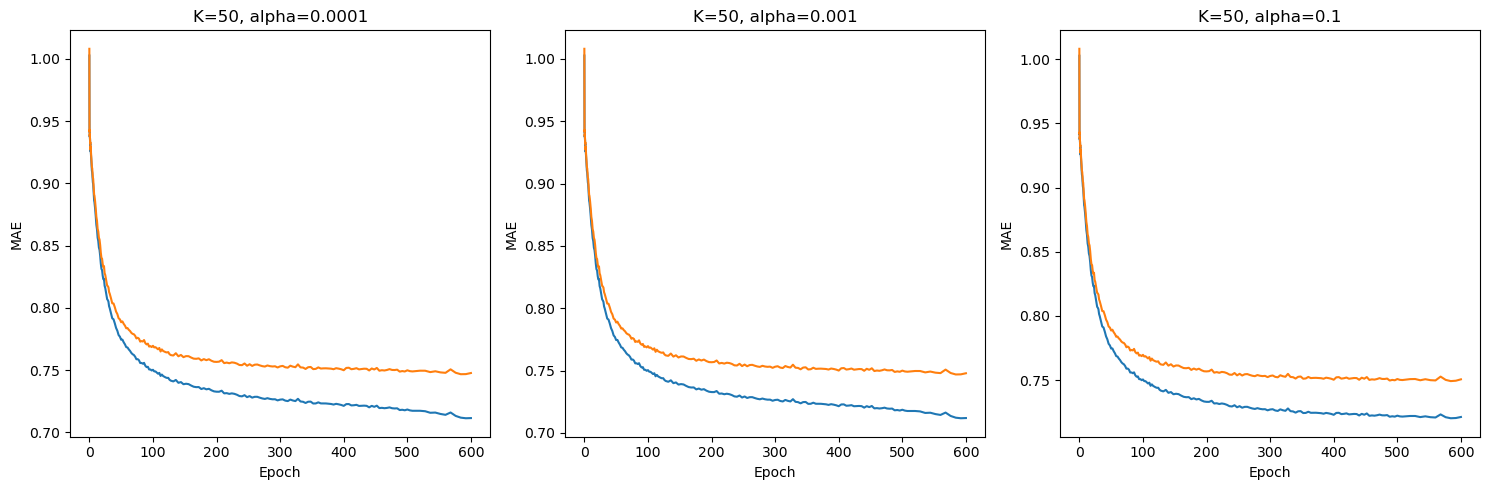

In [14]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
alphas = [0.0001, 0.001, 0.1]

# Create subplots for the trace plots
fig, axs = plt.subplots(1, len(alphas), figsize=(15, 5))

for i, alpha in enumerate(alphas):
    # Create the model and initialize its parameters
    model = CollabFilterOneVectorPerItem(
        n_epochs=600, batch_size=1000, step_size=0.1, n_factors=50, alpha=alpha
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    # Fit the model with SGD
    model.fit(train_tuple, valid_tuple)
    
    # Plot the MAE trace
    axs[i].plot(model.trace_epoch, model.trace_mae_train, label='Training')
    axs[i].plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MAE')
    axs[i].set_title(f'K=50, alpha={alpha}')

plt.tight_layout()
plt.show()

In [ ]:
import json

with open("best_combination.json", "r") as file:
    parameter = json.load(file)

In [ ]:
best_combination = min(best_maes_per_epoch, key=best_maes_per_epoch.get)
best_mae = best_maes_per_epoch[best_combination]

# Train the model with the best combination and plot the MAE traces
best_batch_size, best_step_size, best_alpha = best_combination
model = CollabFilterOneVectorPerItem(
    n_epochs=64, batch_size=best_batch_size, step_size=best_step_size, n_factors=50, alpha=best_alpha
)
model.init_parameter_dict(n_users, n_items, train_tuple)
model.fit(train_tuple, valid_tuple)

plt.figure(figsize=(8, 6))
plt.plot(model.trace_epoch, model.trace_mae_train, label='Training')
plt.plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title(f'Best Model: K = {n_factors}, batch_size = {best_batch_size}, step_size = {best_step_size}, alpha = {best_alpha}')
plt.legend()
plt.show()

plt.tight_layout()
plt.show()

In [ ]:
print(tr)

In [16]:
from sklearn.decomposition import PCA

user_factor = model.param_dict["U"]
item_factor = model.param_dict["V"]
print(item_factor.shape)
print(item_factor)

# for i, u in enumerate(user_factor):
#     for j, v in enumerate(item_factor):
#         plt.scatter(u[0], v[0], label=f'User {i} vs. Item {j}', c='blue', marker='o', alpha=0.5)

# plt.xlabel("User Factors (PCA Dimension 1)")
# plt.ylabel("Item Factors (PCA Dimension 1)")
# plt.title("User Factors (U) vs. Item Factors (V)")
# plt.grid(True)
# plt.show()

(1682, 50)
[[ 1.34495762e-02  1.30554026e-02 -4.65759484e-03 ...  6.09275500e-03
  -2.24143056e-03 -1.30451594e-03]
 [-9.46392660e-03 -2.52421300e-03  7.99390386e-04 ... -2.48814650e-03
   3.98011484e-03 -1.05075040e-02]
 [ 3.71550989e-03 -4.13404587e-03 -1.01841771e-03 ... -9.66895258e-03
  -9.82126825e-03  1.43854533e-02]
 ...
 [-7.26252126e-03 -9.38953003e-03 -8.77534694e-03 ... -2.40179542e-03
  -1.82021272e-03  3.62619603e-03]
 [ 7.49031264e-03  4.80573813e-03 -9.62021602e-03 ... -3.00526741e-02
  -1.02613081e-02  9.12143949e-05]
 [-5.35534489e-03  2.91274550e-02 -3.40905337e-03 ... -1.20319835e-03
   7.44307470e-03 -9.18875340e-03]]
